## Исследование двух тарифных планов "Смарт" и "Ультра" для оператора сотовой связи

    Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи.
    Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
    Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять,
    какой тариф приносит больше денег. Нужно проанализировать поведение клиентов и
    сделать вывод - какой тариф лучше.

**Описание тарифов**

***Тариф «Смарт»***

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей
    
***Тариф «Ультра»***

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей

    «Мегалайн» всегда округляет вверх значения минут и мегабайтов.
    Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Содержание:
* [Шаг 1. Общая информация](#1-bullet)
* [Шаг 2. Предобработка данных](#2-bullet)
* 2.1. [Приведение данных к нужным типам](#2-1-bullet)
* 2.2. [Работа с пропусками](#2-2-bullet)
* 2.3. [Поиск дубликатов](#2-3-bullet)
* 2.4. [Количество отправленных сообщений по месяцам](#2-4-bullet)
* 2.5. [Объем израсходованного интернет-трафика  по месяцам](#2-5-bullet)
* 2.6. [Доля абонентов тарифов smart и ultra  в выборке](#2-6-bullet)
* 2.7. [Помесячная выручка с каждого пользователя](#2-7-bullet)
* [Шаг 3. Анализ данных](#3-bullet)
* 3.1. [Сколько минут разговора требуется пользователем каждого тарифа в месяц](#3-1-bullet)
* 3.2. [Сколько сообщений требуется пользователем каждого тарифа в месяц](#3-2-bullet)
* 3.3. [Какой объем интернет-трафика требуется пользователем каждого тарифа в месяц](#3-3-bullet)
* [Шаг 4. Проверка гипотез](#4-bullet)
* 4.1. [Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается](#4-1-bullet)
* 4.2.[Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4-2-bullet)
* [Шаг 5. Общий вывод](#5-bullet)

### Шаг 1. Общая информация<a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Описание данных**: 
***Таблица users (информация о пользователях)***

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
 users['user_id'].duplicated().sum()

0

In [5]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

* в таблице 'users' 8 колонок и 500 строк.
* в колонке ['churn_date'] есть пропущенные значения. Если значение пропущено, то тариф еще действовал на момент выгрузки данных. Таким образом, 462 тарифа действовали на момент выгрузки данных, 38  не действовали. Пропуски будут оставлены, так как для решения поставленных задач, данные в этой колонке не нужны. 
- в колонке ['churn_date'] и ['reg_date'] - необходимо перевести значения из строки в дату.
- в колонке ['user_id'] все пользователи уникальные, дубликатов нет.
- так как далее в иследовании необходимо будет группировать выборку по регионам ("Москва" и "другие регионы", убедилась, что в колонке ['city'] нет разных вариантов написания города "Москва".

In [6]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Описание данных**: ***Таблица calls (информация о звонках)***

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


* в таблице 'calls' 4 колонки и 202607 строк
* в колонках отсутствуют пропущенные значения
* в колонке ['call_date'] - необходимо перевести значения из строки в дату. 

In [8]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Описание данных**: ***Таблица messages (информация о сообщениях)***

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


  
* в таблице 'messages' 3 колонки и 123036 строк
* в колонках отсутствуют пропущенные значения
* в колонке ['message_date'] необходимо перевести значения из строки в дату.

In [10]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**Описание данных**: ***Таблица internet (информация об интернет-сессиях)***

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


* в таблице 'internet' 4 колонки и 149396 строк
* в колонках отсутствуют пропущенные значения
* в колонке ['session_date'] необходимо перевести значения из строки в дату.

In [12]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Описание данных**: ***Таблица tariffs (информация о тарифах)***

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


* в таблице 'tariffs' 8 колонок и 2 строчки
* в колонках отсутствуют пропущенные значения
* в таблице нет колонок, которые нужно приводить к другому типу данных

## Шаг 2. Предобработка данных<a class="anchor" id="2-bullet"></a>

### 2.1. Приведение данных к нужным типам<a class="anchor" id="2-1-bullet"></a>

#### Таблица users

In [14]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


  
    В колонках ['churn_date'] и ['reg_date'] переведены значения из строки в дату.

#### Таблица calls

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


    В колонке ['call_date'] переведены значения из строки в дату.

####  Таблица messages

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB



    В колонке ['message_date'] переведены значения из строки в дату. 

####  Таблица internet

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB



    В колонке ['session_date'] переведены значения из строки в дату. 

### 2.2. Поиск ошибок в данных: длительность звонков и объем трафика<a class="anchor" id="2-2-bullet"></a>

 Рассмотрим данные в таблице calls в колонке ['duration']

In [23]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Text(0.5, 0, 'длительность звонка в минутах')

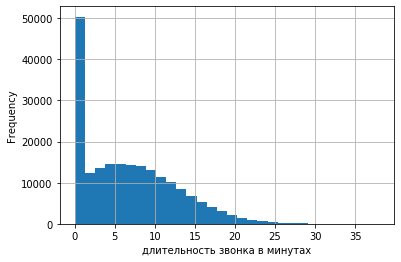

In [24]:
calls['duration'].plot(kind='hist', grid=True, bins=30)
plt.xlabel("длительность звонка в минутах")


    В данных присутствуют звонки с продолжительностью 0 минут.
    Выясним точное количество таких звонков в выборке.

In [25]:
len(calls[(calls['duration']==0)]) / len(calls)

0.19551644316336553

In [26]:
min_duration = calls[(calls['duration']==0)]
len(min_duration)

39613


    Таким образом, в выборке  39613 шт. звонков, длительность которых была 0 минут.
    Звонки с нулевой продолжительностью составляют 19,5% от общего числа звонков.
    
    Данные выглядят подозрительно, так как оператор сотовой связи всегда округляет вверх
    значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе
    должна засчитываться целая минута.

    Проверим, к какому тарифу относятся такие звонки. Для этого объединим две таблицы
    calls и users.

In [27]:
calls_tariffs = calls.merge(users, on='user_id', how='left')
calls_tariffs.head()

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0.00,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0.00,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-06-11,2.85,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-09-21,13.80,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-15,5.18,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [28]:
calls_tariffs.query('duration == 0.00').pivot_table(index='tariff', values='duration', aggfunc='count')

,duration
tariff,
smart,25669
ultra,13944


    
    Звонки с продолжительносью 0 минут есть в обоих тарифах:
    в тарифе smart - 25669 звонков, в тарифе ultra - 13944 шт.

    Таким образом, нельзя предположить, что в каком-то тарифе произошла ошибка при округлении
    и из-за этого появились нулевые значения.

    Можно предположить, что в датасет попали исходящие звонки, на которые не ответили по
    какой-то причине: сбросили, второй абонент был не доступен, звонок был отклонен. Т.е.
    исходящий звонок был, а продолжительность разговора составила 0 минут.  Такие звонки
    не вычетают минуты из пакета и не приносит прибыль оператору, их нет смысла рассматривать
    для решения поставленных задач. По этой причине удалю все звонки с нулевой
    продолжительностью. 

In [29]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

In [30]:
calls['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64


    Видим, что минимальное значение изменилось с 0 на 0,01.
    Так как стоимости в тарифах определяются за минуту разговора, а  оператор сотовой связи
    всегда округляет вверх значения до целой минуты,  округляем значения c помощью np.ceil

In [31]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [32]:
calls['duration'].describe()

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

Text(0.5, 0, 'длительность звонка в минутах')

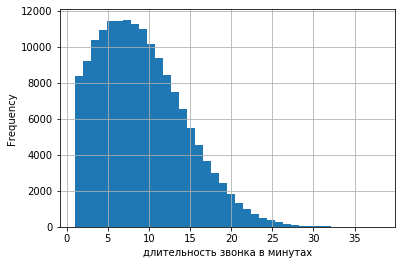

In [33]:
calls['duration'].plot(kind='hist', grid=True, bins=38)
plt.xlabel("длительность звонка в минутах")

    
    В колонке ['duration'] теперь отстутствуют разговоры с продолжтьельностью 0 минут.
    Минимальная продолжительность разговора - 1 минута. Все длительности разговоров
    округлены до целой минуты.
    
    Рассмотрим таблицу internet и значения в колонке ['mb_used'] 

In [34]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Text(0.5, 0, 'объем интернет-трафика, МБ')

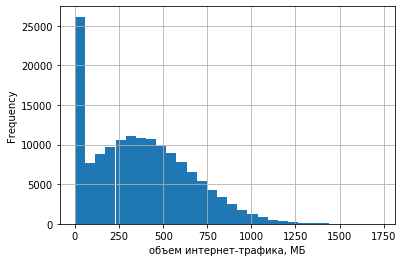

In [35]:
internet['mb_used'].plot(kind='hist', grid=True, bins=30)
plt.xlabel("объем интернет-трафика, МБ")

   
    В данных присутствуют сессии с потраченным интернет-трафиком 0 мегабайт.
    Выясним точное количество таких сессий в выборке.

In [36]:
len(internet[(internet['mb_used']==0)]) / len(internet)*100

13.118155773916303

In [37]:
min_mb_used = internet[(internet['mb_used']==0)]
len(min_mb_used)

19598

    Таким образом, 0 мегабайт было потрачено во время 19598 сессий.
    Сессии с потраченными трафиком 0 мегабайт составляют 13,1% от общего числа сессий.
    Данные выглядят подозрительно, так как оператор сотовой связи всегда округляет вверх
    значения до целого мегабайта. 

    Международная организации «Ookla» изучила четыре основных сотовых оператора России:
    МТС, Билайн, Мегафон и теле2. По данным за первое полугодие 2019г:
    -  средняя скорость загрузки от 7,93 МБ в секунду  до 11,88 Мб в секунду
    - средняя скорость скачивания от 14,51 МБ в секунду  до 27,31 МБ в секунду

    Предположим, что сессия была меньше секунды и никакой операции не было выполнено.
    Например, сайт не загрузился, произошла ошибка в соединении, произошед сбой и т.д.
    Таким образом, мегабайты не были потрачены и не вычитаются из пакета абонента. Сессии
    с потраченными трафиком 0 мегабайт не нужны для решения поставленных задач и будут удалены.

In [38]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

In [39]:
internet['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

     Минимальное значение измелось с 0 на 0,03 Мб.
     Так как стоимости в тарифах определяются за целый Мб, округляем значения c помощью np.ceil

In [40]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [41]:
internet['mb_used'].describe()

count    129798.000000
mean        426.581758
std         255.596114
min           1.000000
25%         228.000000
50%         401.000000
75%         593.000000
max        1725.000000
Name: mb_used, dtype: float64

Text(0.5, 0, 'объем интернет-трафика, МБ')

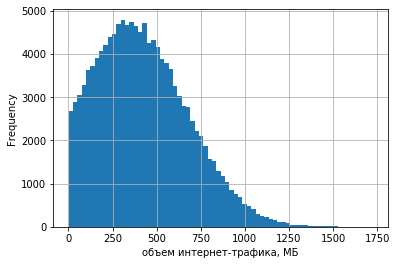

In [42]:
internet['mb_used'].plot(kind='hist', grid=True, bins=70)
plt.xlabel("объем интернет-трафика, МБ")

    В колонке ['mb_used'] теперь отстутствуют сессии с потраченными трафиком 0 мегабайт.
    Минимальное значение изменилось с "0" на "1" МБ.
    Весь потраченный трафик округлен до  целого МБ.

### 2.3. Количество звонков и израсходаванных минут разговоров по месяцам<a class="anchor" id="2-3-bullet"></a>

  
    Добавим новую колонку ['month'] в таблицу calls

In [43]:
calls['month'] = calls['call_date'].dt.month

In [44]:
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


In [45]:
calls_by_month = calls.groupby('month').agg({'id':'nunique', 'duration':'sum'}).reset_index()
calls_by_month.columns = ['month', 'qty_calls', 'duration_per_month']
calls_by_month

,month,qty_calls,duration_per_month
0,1,1164,10784.0
1,2,2705,24455.0
2,3,5383,48151.0
3,4,7504,66310.0
4,5,10116,88810.0
5,6,11833,105180.0
6,7,14780,131746.0
7,8,17257,153698.0
8,9,19446,173475.0
9,10,21757,193928.0


Text(0.5, 1.0, 'Количество звонков и израсходаванных минут разговоров по месяцам')

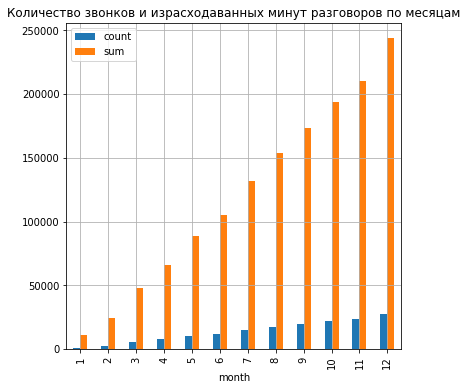

In [46]:
calls.pivot_table(index='month', values='duration', aggfunc=('count','sum')).plot(kind='bar', grid=True, figsize=(6, 6))
plt.title('Количество звонков и израсходаванных минут разговоров по месяцам')

    1. Мы видим зависимость, чем больше звонков сделано в месяц, тем больше израсходованных
    минут в месяц.
    
    2. Количество звонков и израсходованных минут увеличиваются с января по декабрь.
    В каждом месяце происходит прирост. Такое может быть, например, если тарифы запускались
    в январе, и с каждым месяцем прибавлялось число абонентов.

### 2.4. Количество отправленных сообщений по месяцам<a class="anchor" id="2-4-bullet"></a>

In [47]:
messages['month'] = messages['message_date'].dt.month

In [48]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [49]:
messages.pivot_table(index='month', values='id', aggfunc='count')

,id
month,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


Text(0.5, 1.0, 'Количество отправленных сообщений по месяцам')

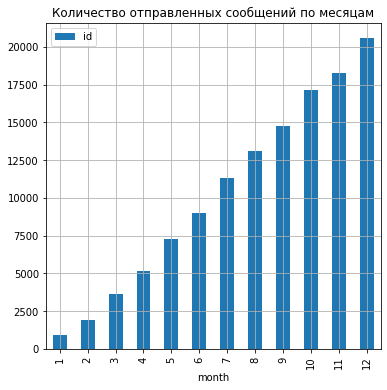

In [50]:
messages.pivot_table(index='month', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(6, 6))
plt.title('Количество отправленных сообщений по месяцам')

    Количество отправленных сообщей увеличивается каждый месяц с января по декабрь.
    В каждом месяце происходит прирост. График выглядит аналогично предыдущему графику
    (количество звонков и израсходаванные минуты).

### 2.5. Объем израсходованного интернет-трафика  по месяцам<a class="anchor" id="2-5-bullet"></a>

In [51]:
internet['month'] = internet['session_date'].dt.month

In [52]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9


In [53]:
internet_by_month = internet.groupby('month').agg({'id':'nunique', 'mb_used':'sum'}).reset_index()
internet_by_month.columns = ['month', 'qty_session', 'mb_used_per_month']
internet_by_month

,month,qty_session,mb_used_per_month
0,1,966,408213.0
1,2,2263,956348.0
2,3,4262,1813960.0
3,4,5692,2436111.0
4,5,8209,3529893.0
5,6,9656,4184770.0
6,7,11788,5035299.0
7,8,14009,6005126.0
8,9,15198,6454931.0
9,10,17367,7400754.0


Text(0.5, 1.0, 'Объем израсходованного интернет-трафика  по месяцам')

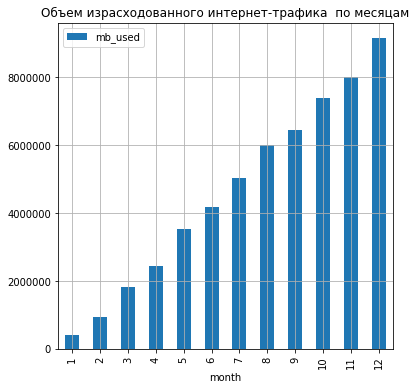

In [54]:
internet.pivot_table(index='month', values='mb_used', aggfunc='sum').plot(kind='bar', grid=True, figsize=(6, 6))
plt.title('Объем израсходованного интернет-трафика  по месяцам')

    Объем израсходованного интернет-трафика увеличивается каждый месяц с января по декабрь.
    В каждом месяце происходит прирост. График выглядит аналогично предыдущим двум
    (количество звонков и сообщений).

###  2.6 Доля абонентов тарифов smart и ultra  в выборке<a class="anchor" id="2-6-bullet"></a>

    Для рассчета необходимо объединить данные из несколько таблиц

In [55]:
inf_from_calls = calls.groupby(['user_id', 'month'])['duration'].sum()

In [56]:
inf_from_messages = messages.groupby(['user_id', 'month'])['id'].count()

In [57]:
inf_from_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum()

In [58]:
common_table = pd.concat([inf_from_calls, inf_from_messages, inf_from_internet], axis=1)
common_table = common_table.reset_index()
common_table.columns = ['user_id', 'month', 'call_duration', 'amount_message', 
                            'internet_mb_used']
common_table.head()

,user_id,month,call_duration,amount_message,internet_mb_used
0,1000,5,159.0,22.0,2256.0
1,1000,6,172.0,60.0,23257.0
2,1000,7,340.0,75.0,14016.0
3,1000,8,408.0,81.0,14070.0
4,1000,9,466.0,57.0,14581.0


Добавим в таблицу данные о пользователях из таблицы users

In [59]:
common_table = common_table.merge(users, on='user_id', how='left')
common_table.head()

,user_id,month,call_duration,amount_message,internet_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


    Так как в тарифах стоимость взимается за гигабайты, переведем мегабайты в гигабайты.
    Далле округлим значения до целого числа в большую сторону.

In [60]:
common_table['internet_gb_used'] = common_table['internet_mb_used'] / 1024 

In [61]:
common_table['internet_gb_used'] = common_table['internet_gb_used'].apply(np.ceil)

In [62]:
common_table['internet_gb_used'].describe()

count    3201.000000
mean       17.400187
std         7.343968
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: internet_gb_used, dtype: float64

    Проверим предпочтения абонементов в зависимости от тарифа.
    Для начала выясним сколько абонентов выбрали тариф SMART, а сколько абонентов тариф ULTRA.

In [63]:
common_table['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Text(0.5, 1.0, 'Соотношение клиентов с тарифами SMART и ULTRA')

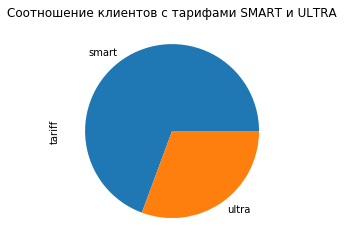

In [64]:
common_table['tariff'].value_counts().plot(y='tariff', kind='pie')
plt.title('Соотношение клиентов с тарифами SMART и ULTRA')

    Абоненты с тарифом SMART составляют 69.35 % от общей выборки.    
    Абоненты с тарифом ULTRA составляют 30.65 % от общей выборки.

    Посмторим на показатели абонентов двух тарифов:
    длительность звонков, количество сообщений, объем интернет-тарифка.

In [65]:
tariff_table = common_table.groupby('tariff').agg({'amount_message':'sum', 'call_duration':['count','sum'], 'internet_gb_used':['count','sum']}).reset_index()
tariff_table

tariff amount_message call_duration           internet_gb_used         
                    sum         count       sum            count      sum
0  smart        74413.0          2221  931577.0             2227  36465.0
1  ultra        48623.0           947  518724.0              974  19233.0

    Так как абонентов, принадлежащих к тарифу SMART  больше, то и их доля в звонках,
    сообщениях, интернет-трафике больше. Построим графики для каждого из показателей.

Text(0.5, 1.0, 'Количество отправленных сообщений')

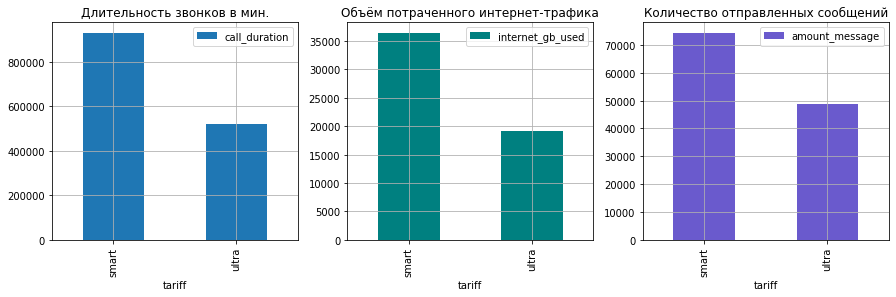

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
common_table.pivot_table(index='tariff', values='call_duration', aggfunc='sum').plot(kind='bar', grid=True, ax=axes[0])
common_table.pivot_table(index='tariff', values='internet_gb_used', aggfunc='sum').plot(kind='bar', grid=True, ax=axes[1], color='teal')
common_table.pivot_table(index='tariff', values='amount_message', aggfunc='sum').plot(kind='bar', grid=True, ax=axes[2], color='slateblue')
axes[0].set_title('Длительность звонков в мин.')
axes[1].set_title('Объём потраченного интернет-трафика')
axes[2].set_title('Количество отправленных сообщений')

    То что, абонентов тарифа SMART больше, чем абонентов ULTRA, и они проявляют больше
    активностей, не значит, что тариф SMART выгоднее для сотового оператора. Необходимо
    проверить помесячную выручку с каждого пользователя

###  2.7. Помесячная выручка с каждого пользователя<a class="anchor" id="2-7-bullet"></a>

    Создадим новую колонку, в которой вычтем бесплатный лимит минут из суммарного
    количества звонков за месяц.

In [70]:
def calls_over_tariff(row):
    if row['tariff'] == 'smart':
        result = row['call_duration'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['call_duration'] - 3000
        return np.where(result > 0, result, 0)

In [71]:
common_table['extra_minutes'] = common_table.apply(calls_over_tariff, axis=1)

    Создадим новую колонку, в которой вычтем бесплатный лимит сообщений из суммарного
    количества сообщений за месяц.

In [72]:
def message_over_tariff(row):
    if row['tariff'] == 'smart':
        result = row['amount_message'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['amount_message'] - 1000
        return np.where(result > 0, result, 0)

In [73]:
common_table['extra_message'] = common_table.apply(message_over_tariff, axis=1)

    Создадим новую колонку, в которой вычтем бесплатный лимит интернет-трафика из
    потраченного трафика за месяц.

In [74]:
def internet_over_tariff(row):
    if row['tariff'] == 'smart':
        result = row['internet_gb_used'] - 15
        return np.where(result > 0, result, 0)
    else:
        result = row['internet_gb_used'] - 30 
        return np.where(result > 0, result, 0)

In [75]:
common_table['extra_internet'] = common_table.apply(internet_over_tariff, axis=1)

In [76]:
common_table.head() 

,user_id,month,call_duration,amount_message,internet_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_gb_used,extra_minutes,extra_message,extra_internet
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,0.0,0.0,0.0
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,0.0,0.0,0.0
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,0.0,0.0,0.0


Получившейся остаток умножим на значения из тарифного плана:

In [77]:
def income_calls(row):
    if row['tariff'] == 'smart':
        result = row['extra_minutes'] * 3
        return result
    else:
        result = row['extra_minutes'] * 1
        return result

In [78]:
common_table['income_calls'] = common_table.apply(income_calls, axis=1)

In [79]:
def income_message(row):
    if row['tariff'] == 'smart':
        result = row['extra_message'] * 3
        return result
    else:
        result = row['extra_message'] * 1
        return result

In [80]:
common_table['income_message'] = common_table.apply(income_message, axis=1)

In [81]:
def income_internet(row):
    if row['tariff'] == 'smart':
        result = row['extra_internet'] * 200
        return result
    else:
        result = row['extra_internet'] * 150
        return result

In [82]:
common_table['income_internet'] = common_table.apply(income_internet, axis=1)

    Посмотрим на сколько превысили лимит базового пакета абоненты двух тарифов.
    За что пришлось доплачивать и сколько.

In [83]:
common_table.pivot_table(index='tariff', values=('income_calls', 'income_message', 'income_internet'), aggfunc='sum')

,income_calls,income_internet,income_message
tariff,,,
smart,278217.0,1342800.0,38784.0
ultra,0.0,119250.0,0.0


    Из таблицы выше мы видим, что абоненты с тарифом SMART  превышают свой лимит во всех
    категориях: звонки, сообщения, интернет-трафик. По каждой категории абоненты производят
    дополнительную плату к абонентской плате. 
    Самые большие переплаты за трафик - 1 млн 342 тыс.,
    далее звонки - 278 тыс,
    и на последнем месте доплаты за сообщения - 38 тыс.

    Абоненты с тарифом ULTRA превышают свой лимит только в интернет-трафике.
    Оплачивают дополнительно только за доп.трафик. Сумма составляет 119 тыс., что составляет
    всего 8,88% от суммы переплат за трафик у абонентов SMART.

    Сложим все доп.затраты в одной колонке ['total_income'].

In [84]:
common_table['total_income'] = common_table['income_calls'] + common_table['income_message'] + common_table['income_internet']    

    К получившемуся результату прибавим абонентскую плату

In [85]:
def revenue(row):
    if row['tariff'] == 'smart':
        result = row['total_income'] + 550
        return result
    else:
        result = row['total_income'] + 1950
        return result

In [86]:
common_table['revenue'] = common_table.apply(revenue, axis=1)

In [87]:
common_table.pivot_table(index='tariff', values='revenue', aggfunc=('sum', 'mean', 'median'))

,mean,median,sum
tariff,,,
smart,1294.63930,1038.0,2885751.0
ultra,2071.06599,1950.0,2040000.0


    Сравнивать только общую сумму выручки по тарифам не корректно.
    Мы знаем, что абонентов с тарифом SMART больше, чем абонентов с тарифом ULTRA почти в 2 раза.
    Соответственно и общая выручка будет больше. Необходимо сравнивать сколько в среднем приносит
    выручки один пользователь одного и другого тарифа. 

    Как мы видим выше:
    - средняя выручка на одного пользователя тарифа SMART - 1295 руб. (медиана - 1038 руб.)
    - средняя выручка на одного пользователя тарифа ULTRA - 2071 руб. (медиана - 1950 руб.)

    Тариф ULTRA больше приносит выручки, чем тариф SMART. Оператору необходимо скорректировать
    рекламный бюджет в пользу тарифа ULTRA. Это утверждение будет проверено далее при анализе.  

    Добавим колонку "абонентская плата", чтобы проанализировать выручку по каждому тарифу:
    что приносит больше дохода ежемесячная плата за пакет услуг или дополнительная плата за
    "экстра" услуги.

In [88]:
def rub_monthly_fee_groups(row):
    if row['tariff'] == 'smart':
        return '550'
    else:
        return '1950'
 
common_table['rub_monthly_fee'] = common_table.apply(rub_monthly_fee_groups, axis=1)
pd.set_option('display.max_columns', None)
common_table.head()

,user_id,month,call_duration,amount_message,internet_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_gb_used,extra_minutes,extra_message,extra_internet,income_calls,income_message,income_internet,total_income,revenue,rub_monthly_fee
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950


In [89]:
common_table['rub_monthly_fee'] = pd.to_numeric(common_table['rub_monthly_fee'], errors='coerce')
common_table['rub_monthly_fee'] = round(common_table['rub_monthly_fee'])

In [90]:
common_table['rub_monthly_fee'].describe()

count    3214.000000
mean      979.060361
std       645.539596
min       550.000000
25%       550.000000
50%       550.000000
75%      1950.000000
max      1950.000000
Name: rub_monthly_fee, dtype: float64

    Сравним соотношение абонентской платы к доп.услугам по каждому тарифу

In [91]:
common_table.pivot_table(index='tariff', values=('rub_monthly_fee', 'total_income'), aggfunc='sum')

,rub_monthly_fee,total_income
tariff,,
smart,1225950,1659801.0
ultra,1920750,119250.0


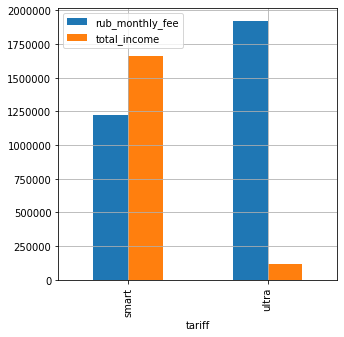

In [148]:
common_table.pivot_table(index='tariff', values=('rub_monthly_fee', 'total_income'), aggfunc='sum').plot(kind='bar', grid=True, figsize=(5, 5))

    В тарифе SMART большую часть дохода составляют доп.платы эа "экстра" услуги,
    когда абоненты превышают свой пакетный лимит.
    Такие доп.платы составляют 57,5% от общей выручки по тарифу.
    Абонентская плата составляет - 42,5%.
    Ниже рассмотрим соотношение доп.оплат за "экстра" услуги по трем категориям:
    звонки, сообщения, интерент-тарфик относительно абонентской платы.

    В тарифе ULTRA основную часть дохода составляет абонентская плата - 94,2%.
    Доп.платы эа "экстра" услуги составляют всего 5,8%.
    Как ранее было выяснено, абоненты тарифа за год ни разу не превысили лимит по звонкам и
    сообщениям. Все доп.платы производились за дополнительный объем интернет-трафика. 

In [93]:
common_table.query('tariff == "smart"').pivot_table(index='tariff', values=('income_calls', 'income_message', 'income_internet', 'rub_monthly_fee'), aggfunc='sum')

,income_calls,income_internet,income_message,rub_monthly_fee
tariff,,,,
smart,278217.0,1342800.0,38784.0,1225950


Text(0.5, 1.0, 'Доход в тарифе SMART по категориям: абонентская плата, звонки, интернет, сообщения')

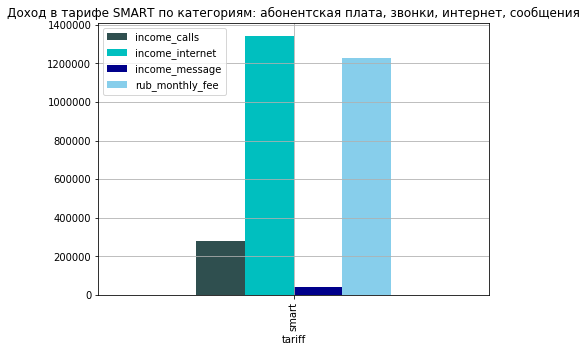

In [151]:
common_table.query('tariff == "smart"').pivot_table(index='tariff', values=('income_internet', 'rub_monthly_fee', 'income_calls', 'income_message'), aggfunc='sum').plot(kind='bar', grid=True, color = ('darkslategrey', 'c', 'darkblue', 'skyblue'), figsize=(7, 5))
plt.title('Доход в тарифе SMART по категориям: абонентская плата, звонки, интернет, сообщения')

    Абоненты тарифа SMART в основном доплачивают за доп.объем интернет-тарифка.
    Эта сумма превышает абонентсую плату на 9,5%. 

    Выручка тарифа SMART выглядит следующим образом:
    - доп.платы за интернет - тарифк = 46,5%
    - абонентская плата - 42,5 %
    - доп.плата за минуты разговора - 9,6%
    - доп.плата за сообщения - 1,4%

## Шаг 3. Анализ данных<a class="anchor" id="3-bullet"></a>

### 3.1. Сколько минут разговора требуется пользователем каждого тарифа в месяц<a class="anchor" id="3-1-bullet"></a>

    Построим диаграммы размаха для обоих тарифов, чтобы сравнить медианы и межквартальный размах.

(-10, 1450)

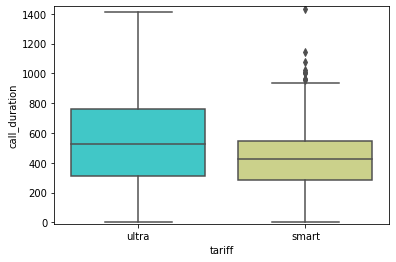

In [95]:
import seaborn as sns
sns.boxplot(x="tariff", y="call_duration", data=common_table, palette='rainbow')
plt.ylim(-10, 1450)

    Видим, что медиана и межквартальный размах у тарифа ULTRA больше, чем у тарифа SMART.
    Это значит, что абоненты с тарифом ULTRA в среднем используют минуты разговора  больше,
    чем абоненты с тарифом SMART. Так же видим, что у тарифа ULTRA датасет сильнее скошен
    вправо (правый ус длинне). Через этот канал приходят те, кто тратит минуты разговора больше 
    медианного значения. 

    Построим отдельно диаграммы размаха для тарифов, чтобы точнее определить выбросы и убрать их
    при дальнейшем анализе данных.

(-10, 940)

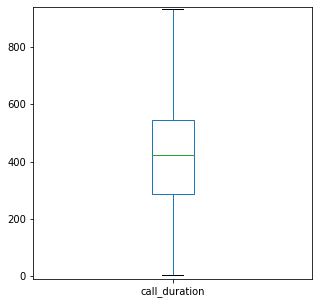

In [96]:
common_table.query('tariff == "smart"')['call_duration'].plot.box(figsize=(5,5))
plt.ylim(-10, 940)

(-10, 1415)

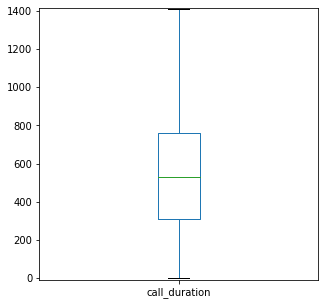

In [97]:
common_table.query('tariff == "ultra"')['call_duration'].plot.box(figsize=(5,5))
plt.ylim(-10, 1415)

    Создадим таблицы по каждому тарифу без выбросов.
    Посчитаем среднее значение, медиану, дисперсию и стандартное отклонение.

In [98]:
smart_call_duration = common_table[(common_table['tariff'] == 'smart') & (common_table['call_duration'] < 940)]
ultra_call_duration = common_table[(common_table['tariff'] == 'ultra') & (common_table['call_duration'] < 1415)]

In [99]:
mean_calls_ultra = ultra_call_duration['call_duration'].mean()
mean_calls_smart = smart_call_duration['call_duration'].mean()
median_calls_ultra = ultra_call_duration['call_duration'].median()
median_calls_smart = smart_call_duration['call_duration'].median()
dispersion_ultra_calls = ultra_call_duration['call_duration'].var()
dispersion_smart_calls = smart_call_duration['call_duration'].var()
std_ultra_calls = ultra_call_duration['call_duration'].std()
std_smart_calls = smart_call_duration['call_duration'].std()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Среднее значение длительности разговоров в месяц, тариф ultra {:.0f}'.format(mean_calls_ultra), 'минут')
print('Среднее значение длительности разговоров в месяц, тариф smart {:.0f}'.format(mean_calls_smart), 'минут')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Медиана длительности разговоров в месяц, тариф ultra {:.0f}'.format(median_calls_ultra), 'минут')
print('Медиана длительности разговоров в месяц, тариф smart {:.0f}'.format(median_calls_smart), 'минут')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Дисперсия - разговоры в месяц, тариф ultra: {:.0f}'.format(dispersion_ultra_calls))
print('Дисперсия - разговоры в месяц, тариф smart: {:.0f}'.format(dispersion_smart_calls))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Стандартное отклонение - разговоры в месяц, тариф ultra: {:.0f}'.format(std_ultra_calls))
print('Стандартное отклонение - разговоры в месяц, тариф smart: {:.0f}'.format(std_smart_calls))

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Среднее значение длительности разговоров в месяц, тариф ultra 545 минут
Среднее значение длительности разговоров в месяц, тариф smart 417 минут
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Медиана длительности разговоров в месяц, тариф ultra 528 минут
Медиана длительности разговоров в месяц, тариф smart 421 минут
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Дисперсия - разговоры в месяц, тариф ultra: 90996
Дисперсия - разговоры в месяц, тариф smart: 33947
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Стандартное отклонение - разговоры в месяц, тариф ultra: 302
Стандартное отклонение - разговоры в месяц, тариф smart: 184


    Построим одновременно гистограмму и график плотности распределения для обоих тарифов

Text(0.5, 1.0, 'Минуты разговора, ULTRA')

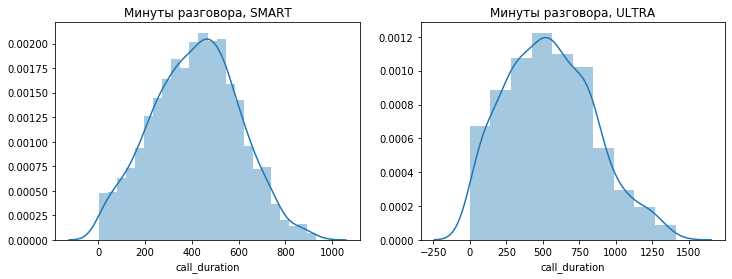

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(smart_call_duration['call_duration'], ax=axes[0])
sns.distplot(ultra_call_duration['call_duration'], bins=10, ax=axes[1])
axes[0].set_title('Минуты разговора, SMART')
axes[1].set_title('Минуты разговора, ULTRA')

 
**Вывод:**

    1) Абоненты с тарифом SMART в среднем используют 417 минуту разговора в месяц.
    В тарифе включено 500 минут разговора.

    2) Абоненты с тарифом ULTRA в среднем используют 545 минуту разговора в месяц.
    В тариф включено 3000 минут разговора, т.е. почти в 5 раз больше, чем нужно 
    в среднем абоненту.
    Таким образом, абоненты переплачивают за минуты разговора и не используют их, что
    выгодно оператору. Как мы выяснили выше, ни один из абонентов не превысил свой лимит
    в этой категории.

  
    Посмотрим, скольким абонентам тарифа SMART хотя бы один раз не хватило пакетного лимита
    в 500 минут разговора.

In [102]:
smart_call_duration.query('extra_minutes > 0')['user_id'].count()

744

    744 абонента хотя бы 1 раз превышали лимит в 500 минут разговора,
    это 33,4% абонентов от общего количества пользователей тарифа SMART.
    Посмотрим поведение абонентов, превыщающих свой лимит, по месяцам.

In [103]:
smart_call_duration.query('extra_minutes > 0').pivot_table(index='month', values='user_id', aggfunc='count')

,user_id
month,
1,1
2,11
3,23
4,28
5,40
6,50
7,69
8,76
9,95


Text(0.5, 1.0, 'Количество абонентов превысивших лимит минут, тариф SMART')

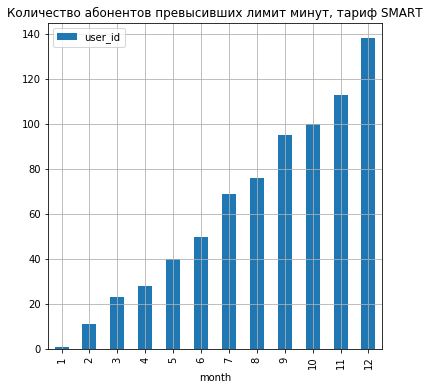

In [104]:
smart_call_duration.query('extra_minutes > 0').pivot_table(index='month', values='user_id', aggfunc='count').plot(kind='bar', grid=True, figsize=(6, 6))
plt.title('Количество абонентов превысивших лимит минут, тариф SMART')

    Количество абонентов SMART, превышающих лимит, растет каждый месяц от января к декабрю. Если
    в январе всего 1 абонет превысил лимит, то в декабре максимальное число - 138 абонентов. 
    Это составляет всего 6,2 % от общего числа абонентов. Т.е. в декабре, месяце в котором было
    больше всего использовано минут разговоров, 93,8 % абонентов хватило лимита в 500 минут.

### 3.2. Сколько сообщений требуется пользователем каждого тарифа в месяц<a class="anchor" id="3-2-bullet"></a>

    Построим диаграммы размаха для обоих тарифов, чтобы сравнить медианы и
    межквартальный размах.

(-10, 200)

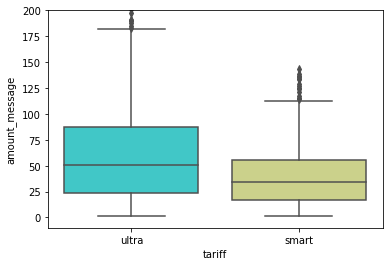

In [105]:
sns.boxplot(x="tariff", y="amount_message", data=common_table, palette='rainbow')
plt.ylim(-10, 200)

    Видим, что медиана и межквартальный размах у тарифа ULTRA больше, чем у тарифа SMART. Это значит, что абоненты
    с тарифом ULTRA в среднем отпраляют сообщений  больше, чем абоненты с тарифом SMART. Так же видим, что у тарифа
    ULTRA датасет сильнее скошен вправо (правый ус длинне). Через этот канал приходят те, кто отправляет сообщения
    больше медианного значения.

    Построим отдельно диаграммы размаха для тарифов, чтобы точнее определить выбросы и убрать их при дальнейшем 
    анализе данных.

(0, 115)

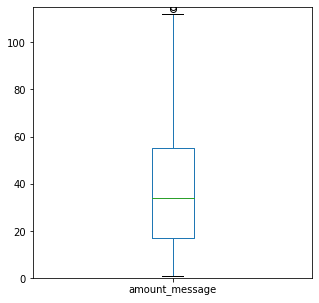

In [106]:
common_table.query('tariff == "smart"')['amount_message'].plot.box(figsize=(5,5))
plt.ylim(0, 115)

(0, 184)

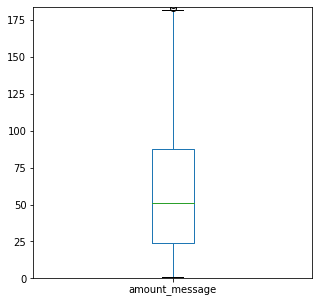

In [107]:
common_table.query('tariff == "ultra"')['amount_message'].plot.box(figsize=(5,5))
plt.ylim(0, 184)

In [108]:
smart_message = common_table[(common_table['tariff'] == 'smart') & (common_table['amount_message'] < 113)]
ultra_message = common_table[(common_table['tariff'] == 'ultra') & (common_table['amount_message'] < 183)]

In [109]:
mean_ultra_message = ultra_message['amount_message'].mean()
mean_smart_message = smart_message['amount_message'].mean()
median_ultra_message = ultra_message['amount_message'].median()
median_smart_message = smart_message['amount_message'].median()
dispersion_ultra_message = ultra_message['amount_message'].var()
dispersion_smart_calls = smart_message['amount_message'].var()
std_ultra_message = ultra_message['amount_message'].std()
std_smart_message = smart_message['amount_message'].std()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Среднее количество сообщений в месяц, тариф ultra {:.0f}'.format(mean_ultra_message), 'шт.')
print('Среднее количество сообщений в месяц, тариф smart {:.0f}'.format(mean_smart_message), 'шт.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Медиана количества сообщений в месяц, тариф ultra {:.0f}'.format(median_ultra_message), 'шт.')
print('Медиана количества сообщений в месяц, тариф smart {:.0f}'.format(median_smart_message), 'шт.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Дисперсия - количество сообщений, тариф ultra: {:.0f}'.format(dispersion_ultra_message))
print('Дисперсия - количество сообщений, тариф smart: {:.0f}'.format(dispersion_smart_calls))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Стандартное отклонение - количество сообщений, тариф ultra: {:.0f}'.format(std_ultra_message))
print('Стандартное отклонение - количество сообщений, тариф smart: {:.0f}'.format(std_smart_message))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Среднее количество сообщений в месяц, тариф ultra 59 шт.
Среднее количество сообщений в месяц, тариф smart 38 шт.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Медиана количества сообщений в месяц, тариф ultra 50 шт.
Медиана количества сообщений в месяц, тариф smart 33 шт.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Дисперсия - количество сообщений, тариф ultra: 1868
Дисперсия - количество сообщений, тариф smart: 663
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Стандартное отклонение - количество сообщений, тариф ultra: 43
Стандартное отклонение - количество сообщений, тариф smart: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


    Построим гистограммы и график плотности распределения для обоих тарифов

Text(0.5, 1.0, 'Количество сообщений, ULTRA')

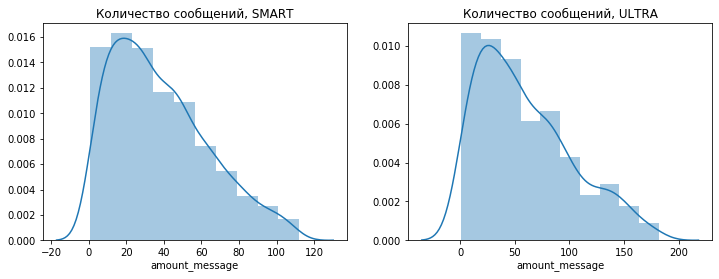

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(smart_message['amount_message'], bins=10, ax=axes[0])
sns.distplot(ultra_message['amount_message'], bins=10, ax=axes[1])
axes[0].set_title('Количество сообщений, SMART')
axes[1].set_title('Количество сообщений, ULTRA')

**Вывод:**

    1) Абоненты с тарифом SMART в среднем отправляют 38 сообщений в месяц.
    В тариф включено 50 сообщений в месяц.

    2) Абоненты с тарифом ULTRA в среднем отправляют 59 сообщений в месяц.
    В тариф включено 1000 сообщений, т.е. почти в 17 раз больше, чем нужно в среднем абоненту.
    Таким образом, абоненты переплачивают за сообщения и не используют их, что выгодно оператору.
    Как мы выяснили выше, ни один из абонентов не превысил свой лимит в этой категории.

      Посмотрим, скольким абонентам тарифа SMART хотя бы один раз не хватило пакетного лимита в 500 минут разговора.

In [112]:
smart_message.query('extra_message > 0')['user_id'].count()

550

    550 абонентов хотя бы 1 раз превышали лимит в 50 сообщений в месяц, это 24,7% абонентов от общего количества 
    пользователей тарифа SMART. Посмотрим поведение абонентов, превыщающих свой лимит, по месяцам.

In [113]:
smart_message.query('extra_message > 0').pivot_table(index='month', values='user_id', aggfunc='count')

,user_id
month,
1,1
2,6
3,19
4,22
5,35
6,42
7,52
8,60
9,63


Text(0.5, 1.0, 'Количество абонентов превысивших лимит по сообщениям, тариф SMART')

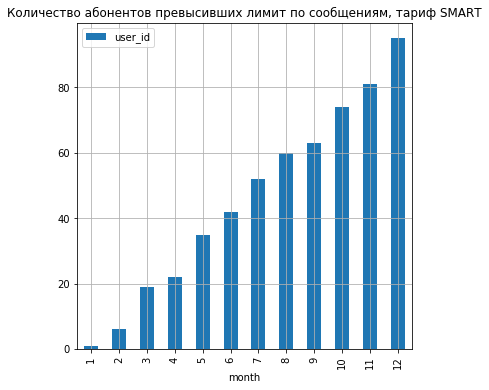

In [114]:
smart_message.query('extra_message > 0').pivot_table(index='month', values='user_id', aggfunc='count').plot(kind='bar', grid=True, figsize=(6, 6))
plt.title('Количество абонентов превысивших лимит по сообщениям, тариф SMART')

    Количество абонентов SMART, превышающих лимит по сообщениям, растет каждый месяц от января к декабрю.
    Если в январе всего 1 абонет превысил лимит, то в декабре максимальное число - 95 абонентов. Это составляет
    всего 4,3 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего отправлено сообщений,
    95,7 % абонентов хватило лимита в 50 сообщений.

### 3.3. Какой объем интернет-трафика требуется пользователем каждого тарифа в месяц<a class="anchor" id="3-3-bullet"></a>

    Построим диаграммы размаха для обоих тарифов, чтобы сравнить медианы и межквартальный размах.

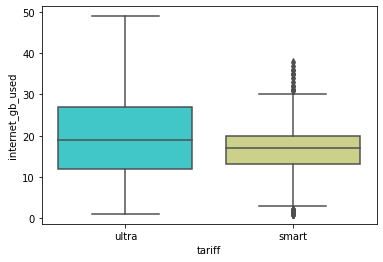

In [115]:
sns.boxplot(x="tariff", y="internet_gb_used", data=common_table, palette='rainbow')

    Видим, что медиана и межквартальный размах у тарифа ULTRA больше, чем у тарифа SMART. Это значит, что абоненты
    с тарифом ULTRA в среднем тратят интернет-трафик  больше, чем абоненты с тарифом SMART. Так же видим, что у
    тарифа ULTRA датасет сильнее скошен вправо (правый ус длинне). Через этот канал приходят те, кто тратит
    интернет-трафик, больше медианного значения.

    Построим отдельно диаграммы размаха для тарифов, чтобы точнее определить выбросы и убрать их при дальнейшем
    анализе данных.

(0, 50)

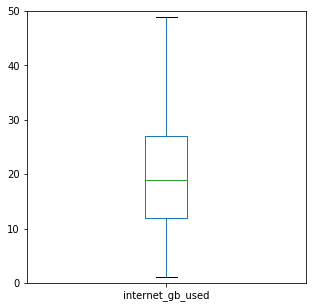

In [116]:
common_table.query('tariff == "ultra"')['internet_gb_used'].plot.box(figsize=(5,5))
plt.ylim(0, 50)

(0, 31)

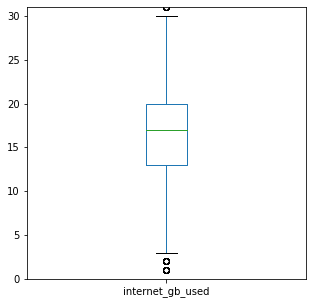

In [117]:
common_table.query('tariff == "smart"')['internet_gb_used'].plot.box(figsize=(5,5))
plt.ylim(0, 31)

In [118]:
smart_internet = common_table[(common_table['tariff'] == 'smart') & (common_table['internet_gb_used'] < 31)]
ultra_internet = common_table[(common_table['tariff'] == 'ultra') & (common_table['internet_gb_used'] < 50)]

In [119]:
mean_ultra_internet = ultra_internet['internet_gb_used'].mean()
mean_smart_internet = smart_internet['internet_gb_used'].mean()
median_ultra_internet = ultra_internet['internet_gb_used'].median()
median_smart_internet = smart_internet['internet_gb_used'].median()
dispersion_ultra_internet = ultra_internet['internet_gb_used'].var()
dispersion_smart_internet = smart_internet['internet_gb_used'].var()
std_ultra_internet = ultra_internet['internet_gb_used'].std()
std_smart_internet = smart_internet['internet_gb_used'].std()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Средний объем интернет-трафика в месяц, тариф ultra {:.0f}'.format(mean_ultra_internet), 'ГБ.')
print('Среднее объем интернет-трафика в месяц, тариф smart {:.0f}'.format(mean_smart_internet), 'ГБ.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Медиана объема интернет-трафика в месяц, тариф ultra {:.0f}'.format(median_ultra_internet), 'ГБ.')
print('Медиана объема интернет-трафика в месяц, тариф smart {:.0f}'.format(median_smart_message), 'ГБ.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Дисперсия - объем интернет-трафика, тариф ultra: {:.0f}'.format(dispersion_ultra_internet))
print('Дисперсия - объем интернет-трафика, тариф smart: {:.0f}'.format(dispersion_smart_internet))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Стандартное отклонение - объем интернет-трафика, тариф ultra: {:.0f}'.format(std_ultra_internet))
print('Стандартное отклонение - объем интернет-трафика, тариф smart: {:.0f}'.format(std_smart_internet))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Средний объем интернет-трафика в месяц, тариф ultra 20 ГБ.
Среднее объем интернет-трафика в месяц, тариф smart 16 ГБ.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Медиана объема интернет-трафика в месяц, тариф ultra 19 ГБ.
Медиана объема интернет-трафика в месяц, тариф smart 33 ГБ.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Дисперсия - объем интернет-трафика, тариф ultra: 94
Дисперсия - объем интернет-трафика, тариф smart: 31
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Стандартное отклонение - объем интернет-трафика, тариф ultra: 10
Стандартное отклонение - объем интернет-трафика, тариф smart: 6
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


    Построим одновременно гистограмму и график плотности распределения для обоих тарифов

Text(0.5, 1.0, 'Объем интернет-трафика, ULTRA')

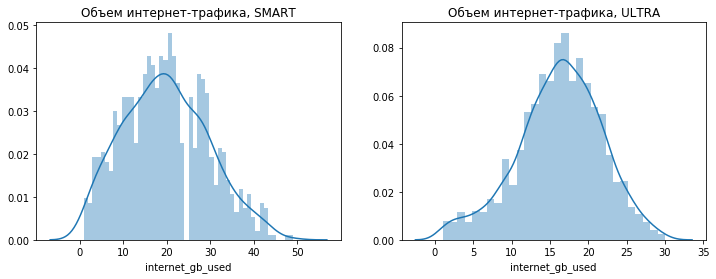

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(ultra_internet['internet_gb_used'], bins=50, ax=axes[0])
sns.distplot(smart_internet['internet_gb_used'], bins=30, ax=axes[1])
axes[0].set_title('Объем интернет-трафика, SMART')
axes[1].set_title('Объем интернет-трафика, ULTRA')

 
***Вывод:***

    1) Абонентам с тарифом SMART в среднем требуется 16 ГБ объема интернет-трафика.
    В тариф включено 15 ГБ интернет-трафика.

    2) Абоненты с тарифом ULTRA в среднем требуется 20 ГБ объема интернет-трафика.
    В тариф включено 30 ГБ интернет-трафика, т.е. в 1,5 раз больше, чем нужно в среднем абоненту.
    Таким образом, абоненты переплачивают за интернет-трафик и не используют его полностью, что выгодно оператору.
    Как мы выяснили выше, это единственная категория, в которой абоненты превышают лимит и она приносит всего 5,8%
    от общей выручки.

    Посмотрим, скольким абонентам тарифа SMART и ULTRA хотя бы один раз не хватило их пакетного лимита.

In [122]:
smart_internet.query('extra_internet > 0')['user_id'].count()


1291

In [123]:
ultra_internet.query('extra_internet > 0')['user_id'].count()


134

    1291 абонентов тарифа SMART хотя бы 1 раз превышали лимит 15ГБ в месяц,
    это 57,9% абонентов от общего количества пользователей тарифа SMART. 

    134 абонентов тарифа ULTRA хотя бы 1 раз превышали лимит 30ГБ в месяц,
    это 13,6% абонентов от общего количества пользователей тарифа ULTRA.

    Посмотрим поведение абонентов, превыщающих свой лимит, по месяцам.

In [124]:
smart_internet.query('extra_internet > 0').pivot_table(index='month', values='user_id', aggfunc='count')

,user_id
month,
1,7
2,14
3,40
4,45
5,78
6,90
7,112
8,145
9,149


In [125]:
ultra_internet.query('extra_internet > 0').pivot_table(index='month', values='user_id', aggfunc='count')

,user_id
month,
2,2
3,5
4,5
5,6
6,9
7,14
8,17
9,14
10,17


Text(0.5, 1.0, 'Количество абонентов превысивших лимит по интернет-трафику, тариф SMART и ULTRA')

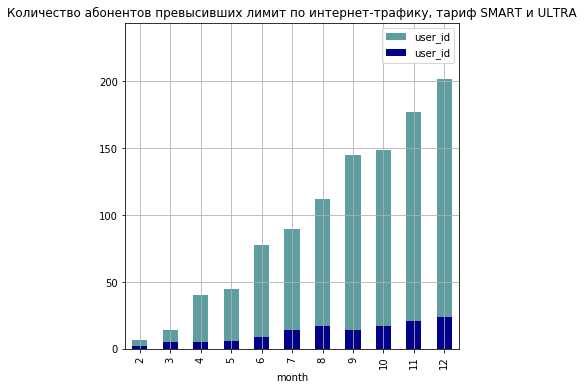

In [172]:
ax = smart_internet.query('extra_internet > 0').pivot_table(index='month', values='user_id', aggfunc='count').plot(kind='bar', grid=True, color = 'cadetblue', figsize=(6, 6))
ultra_internet.query('extra_internet > 0').pivot_table(index='month', values='user_id', aggfunc='count').plot(ax=ax, kind='bar', grid=True, color = 'darkblue', figsize=(6, 6))
plt.title('Количество абонентов превысивших лимит по интернет-трафику, тариф SMART и ULTRA')

    Количество абонентов SMART, превышающих лимит по интернет-трафику, растет каждый месяц от января к декабрю.
    Если в январе всего 7 абонет превысил лимит, то в декабре максимальное число - 232 абонента. Это составляет
    10,4 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего потрачено интернет-трафика,
    89,6 % абонентов хватило лимита в 15ГБ.

    Количество абонентов ULTRA, превышающих лимит по интернет-трафику, растет каждый месяц от января к декабрю.
    Если в январе всего 2 абонет превысил лимит, то в декабре максимальное число - 24 абонента. Это составляет
    2.4 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего потрачено интернет-трафика,
    97.6 % абонентов хватило лимита в 30ГБ.

## Шаг 4. Проверка гипотез<a class="anchor" id="4-bullet"></a>

### 4.1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается <a class="anchor" id="4-1-bullet"></a>


    
*H0 (нулевая гипотеза)* - средняя выручка пользователей тарифа ***smart*** не отличается от средней выручки пользователей тарифа ***ultra***.

*H1 (альтернативная гипотеза)* - средняя выручка пользователей тарифа ***smart*** отличается от средней выручки пользователей тарифа ***ultra***.

In [127]:
from scipy import stats as st


    Создадим две отдельные выборки по тарифам, чтобы потом сравнить средние выручки

In [128]:
pd.set_option('mode.chained_assignment', None)
smart_tariff = common_table[(common_table['tariff'] == 'smart')]
ultra_tariff = common_table[(common_table['tariff'] == 'ultra')]

In [129]:
alpha = 0.05
results = st.ttest_ind(smart_tariff['revenue'], ultra_tariff['revenue'], equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 2.9776448000521676e-158
отвергаем гипотезу


 
Таким образом, средняя выручка пользователей тарифа ***smart*** отличается от средней выручки пользователей тарифа ***ultra***.

### 4.2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов<a class="anchor" id="4-2-bullet"></a>

Так как выше мы выяснили, что средняя выручка двух тарифов разная, при анализе выручки по разным регионам будет не корректно объединять две эти группы. Так как показатели абонентов ***ultra*** в регионах могут сильно влиять на показатели абонентов тарифа ***smart***.
Проверим гипотезу для обоих тарифов.

***Тариф smart :*** 

*H0 (нулевая гипотеза)* - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов тарифа ***smart***.

*H1 (альтернативная гипотеза)* - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов тарифа ***smart***.

***Тариф ultra :*** 

*H0 (нулевая гипотеза)* - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов тарифа ***ultra***.

*H1 (альтернативная гипотеза)* - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов тарифа ***ultra***.

In [130]:
def region_groups(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'другой регион'

smart_tariff['region_groups'] = smart_tariff.apply(region_groups, axis=1)
ultra_tariff['region_groups'] = ultra_tariff.apply(region_groups, axis=1)

In [131]:
smart_tariff.head(4)

,user_id,month,call_duration,amount_message,internet_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_gb_used,extra_minutes,extra_message,extra_internet,income_calls,income_message,income_internet,total_income,revenue,rub_monthly_fee,region_groups
8,1001,11,430.0,NaN,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,19.0,0.0,0.0,4.0,0.0,0.0,800.0,800.0,1350.0,550,Москва
9,1001,12,414.0,NaN,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550,Москва
10,1002,6,117.0,4.0,10871.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550,другой регион
11,1002,7,214.0,11.0,17601.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,18.0,0.0,0.0,3.0,0.0,0.0,600.0,600.0,1150.0,550,другой регион


In [132]:
ultra_tariff.head(4)

,user_id,month,call_duration,amount_message,internet_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_gb_used,extra_minutes,extra_message,extra_internet,income_calls,income_message,income_internet,total_income,revenue,rub_monthly_fee,region_groups
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950,другой регион
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950,другой регион
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950,другой регион
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950,другой регион


     Количество обонентов из Москвы и из других регионов, тариф SMART:

In [133]:
smart_tariff['region_groups'].value_counts()

другой регион    1843
Москва            386
Name: region_groups, dtype: int64

    Количество обонентов из Москвы и из других регионов, тариф ULTRA:

In [134]:
ultra_tariff['region_groups'].value_counts()

другой регион    760
Москва           225
Name: region_groups, dtype: int64

    Разделим датасет ТАРИФ SMART на две выборки в зависимости от региона, чтобы сравнить среднюю выручку

In [135]:
pd.set_option('mode.chained_assignment', None)
smart_tariff_moscow = smart_tariff[(smart_tariff['region_groups'] == 'Москва')]
smart_tariff_region = smart_tariff[(smart_tariff['region_groups'] == 'другой регион')]

In [136]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(smart_tariff_moscow['revenue'], smart_tariff_region['revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 0.1642380351651886
не получилось отвергнуть гипотезу


    Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других
    регионов тарифа SMART.

In [137]:
mean_income_smart_moscow = smart_tariff_moscow['revenue'].mean()
mean_income_smart_region = smart_tariff_region['revenue'].mean()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Средняя выручка пользователей из Москвы в месяц, тариф smart {:.0f}'.format(mean_income_smart_moscow), 'руб.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Средняя выручка пользователей из др.регионов в месяц, тариф smart {:.0f}'.format(mean_income_smart_region), 'руб.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Средняя выручка пользователей из Москвы в месяц, тариф smart 1245 руб.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Средняя выручка пользователей из др.регионов в месяц, тариф smart 1305 руб.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


    Разделим датасет ТАРИФ ULTRA на две выборки в зависимости от региона, чтобы сравнить среднюю выручку

In [138]:
pd.set_option('mode.chained_assignment', None)
ultra_tariff_moscow = ultra_tariff[(ultra_tariff['region_groups'] == 'Москва')]
ultra_tariff_region = ultra_tariff[(ultra_tariff['region_groups'] == 'другой регион')]

In [139]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(ultra_tariff_region['revenue'], ultra_tariff_moscow['revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 0.8400933420531973
не получилось отвергнуть гипотезу


    Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других
    регионов тарифа ULTRA. 

In [140]:
mean_income_ultra_moscow = ultra_tariff_moscow['revenue'].mean()
mean_income_ultra_region = ultra_tariff_region['revenue'].mean()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Средняя выручка пользователей из Москвы в месяц, тариф ultra {:.0f}'.format(mean_income_ultra_moscow), 'руб.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('Средняя выручка пользователей из др.регионов в месяц, тариф ultra {:.0f}'.format(mean_income_ultra_region), 'руб.')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Средняя выручка пользователей из Москвы в месяц, тариф ultra 2075 руб.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Средняя выручка пользователей из др.регионов в месяц, тариф ultra 2070 руб.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


    Средняя выручка абонентов в Москве и в регионах не отличаются друг от друга в тарифе ULTRA, так как в основном
    абоненты оплачивают только абонентскую плату, которая у всех одинаковая. И только 5,8% суммы приходится на 
    доп.платы за интернет-трафик. Ранее мы выяснили, что всего 13,6% абонентов от общего числа превышали лимит
    по трафику. Посмотрим, откуда эти абоненты. 

In [141]:
ultra_tariff.query('extra_internet > 0').pivot_table(index='region_groups', values=('income_internet'), aggfunc=('count', 'sum'))

,count,sum
region_groups,,
Москва,37,28200.0
другой регион,97,91050.0


    Абоненты, превысившие лимит в трафике, есть как Москве, так и в регионах.
    
    В регионах: 97 абонентов превысили трафик и в сумме они заплатили - 91 050 руб.(4,4% от общей выручки).
    В Москве: 37 абонентов превысили трафик и в сумме они заплотили - 28 200 руб.(1,4% от общей выручки).

    Для общего датасета разница может быть не столь значительной, чтобы быть статистически значимой.

## Шаг 5. Общий вывод<a class="anchor" id="5-bullet"></a>

   
Было проанализировано поведение клиентов двух тарифных планов ***smart***  и  ***ultra***.
Тарифом, приносящим больше выручки, является тариф ***ultra***. Необходимо скорректировать рекламный бюджет исходя из данной информации.

* средняя выручка на одного пользователя тарифа smart (в данной выборке) - 1294.64 руб.
* средняя выручка на одного пользователя тарифа ultra (в данной выборке)- 2071.07 руб.

Далее была проверена гипотеза, что в генеральной совокупности средняя выручка пользователей тарифа ***smart*** отличается от средней выручки пользователей тарифа ***ultra***. Оснований отвергнуть данную гипотезу - нет. 

***Тариф  SMART***

1. Количество абонентов в выборке - 2229 человек, что составляет 69.35% от общей выборки.


2. Абоненты превышают свой лимит во всех категориях: звонки, сообщения, интернет-трафик. Т.е. по каждой категории абоненты производят дополнительную плату к абонентской. Большую часть дохода составляют доп.платы эа "экстра" услуги - ***57,5%*** от общей выручки по тарифу.
Абонентская плата составляет - ***42,5%***.

Выручка тарифа ***smart*** выглядит следующим образом:
* доп.платы за интернет - тарифк = 46,5%
* абонентская плата - 42,5 %
* доп.плата за минуты разговора - 9,6%
* доп.плата за сообщения - 1,4%


3. Абоненты в среднем используют 417 минуту разговора в месяц.
В тариф включено 500 минут разговора.
Количество абонентов, превышающих лимит минут разговора, растет каждый месяц от января к декабрю. Если в январе всего 1 абонет превысил лимит, то в декабре максимальное число - 138 абонентов. Это составляет всего 6,2 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего использовано минут разговоров, ***93,8 %*** абонентов хватило лимита в 500 минут.


4. Абоненты в среднем отправляют 38 сообщений в месяц.
В тариф включено 50 сообщений в месяц.
Количество абонентов, превышающих лимит по сообщениям, растет каждый месяц от января к декабрю. Если в январе всего 1 абонет превысил лимит, то в декабре максимальное число - 95 абонентов. Это составляет всего 4,3 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего отправлено сообщений, ***95,7 %*** абонентов хватило лимита в 50 сообщений.


5. Абонентам в среднем требуется 16 ГБ объема интернет-трафика.
В тариф включено 15 ГБ интернет-трафика, т.е. в среднем абонентам не хватает 1ГБ в месяц.
Количество абонентов, превышающих лимит по интернет-трафику, растет каждый месяц от января к декабрю. Если в январе всего 7 абонет превысил лимит, то в декабре максимальное число - 232 абонента. Это составляет 10,4 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего потрачено интернет-трафика, ***89,6 %*** абонентов хватило лимита в 15ГБ.


6. Была проверена гипотеза, что в генеральной совокупности средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов тарифа ***smart***. Данные подтвердили данную гипотезу, нет оснований ее отвергнуть. 


* Средняя выручка пользователей из Москвы в месяц (в данной выборке) - 1245 руб.
* Средняя выручка пользователей из др.регионов в месяц (в данной выборке) - 1305 руб


***Тариф  ULTRA***

1. Количество абонентов в выборке - 985 человек, что составляет 30,65% от общей выборки.


2. Абоненты тарифа за год ни разу не превысили лимит по звонкам и сообщениям. Абоненты превышают свой лимит только в интернет-трафике. 
Основную часть дохода составляет абонентская плата - ***94,2%***. Доп.платы эа интернет-трафик составляют всего 5,8%.


3. Абоненты в среднем используют 545 минуту разговора в месяц.
В тариф включено 3000 минут разговора, т.е. почти в 5 раз больше, чем нужно в среднем абоненту.
Таким образом, абоненты переплачивают за минуты разговора и не используют их, что выгодно оператору. Как мы выяснили выше, ни один из абонентов не превысил свой лимит в этой категории.


4. Абоненты в среднем отправляют 59 сообщений в месяц.
В тариф включено 1000 сообщений, т.е. почти в 17 раз больше, чем нужно в среднем абоненту.
Таким образом, абоненты переплачивают за сообщения и не используют их, что выгодно оператору. Как мы выяснили выше, ни один из абонентов не превысил свой лимит в этой категории.


5. Абоненты в среднем требуется 20 ГБ объема интернет-трафика.
В тариф включено 30 ГБ интернет-трафика, т.е. в 1,5 раз больше, чем нужно в среднем абоненту.
Таким образом, абоненты переплачивают за интернет-трафик и не используют его полностью, что выгодно оператору.
Количество абонентов ***ultra***, превышающих лимит по интернет-трафику, растет каждый месяц от января к декабрю. Если в январе всего 2 абонет превысил лимит, то в декабре максимальное число - 24 абонента. Это составляет 2.4 % от общего числа абонентов. Т.е. в декабре, месяце в котором было больше всего потрачено интернет-трафика, ***97.6 %*** абонентов хватило лимита в 30ГБ.


6. У нас нет оснований отвергать гипотезу, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов тарифа ***ultra***. 
В основном абоненты оплачивают только абонентскую плату, которая у всех одинаковая. И только 5,8% суммы выручки приходится на доп.платы за интернет-трафик. Мы выяснили, что всего 13,6% абонентов от общего числа превышали лимит по трафику. В эту группу входят как абоненты из Москвы, так и абоненты из регионов.